In [2]:
## Bring in needed mods
import pandas as pd, numpy as np, sys, scipy.stats as ss, glob

## Load in matplot lib
from matplotlib import pyplot as plt

## Bring in seaborn
import seaborn as sns

## Set random seed
np.random.seed(711)

In [3]:
## Load in sims
import mystatslib_wcz as sims

In [4]:
## Load in mod
import epigenomevisulization as epv

In [5]:
## Set paths to dataframes 
## The A549 made by Dr. Vrinda Venu 
a549_path = '../DATA/BEDS/A549.Ceil.genomic.10000.counts.bed.gz'

## Encode data
enco_path = '../DATA/BEDS/ENCODE.Ceil.genomic.10000.counts.bed.gz'

In [6]:
## Read in the a549 data
enco = epv.loaddf(enco_path)

## View head
enco.head()

,Chrom,Left,Right,merged.ENCLB404SKN.filtq30.bam,merged.ENCLB324GIU.filtq30.bam,merged.ENCLB584REF.filtq30.bam,merged.ENCLB758GEG.filtq30.bam,merged.ENCLB605LCC.filtq30.bam,merged.ENCLB293SLX.filtq30.bam,merged.ENCLB907YRF.filtq30.bam,merged.ENCLB918NXF.filtq30.bam,merged.ENCLB817BKI.filtq30.bam,merged.ENCLB734LAL.filtq30.bam,merged.ENCLB432QLN.filtq30.bam,merged.ENCLB621FEI.filtq30.bam,merged.ENCLB074EQT.filtq30.bam,merged.ENCLB984XHJ.filtq30.bam,merged.ENCLB937FOM.filtq30.bam,merged.ENCLB715JYV.filtq30.bam
0,chr1,1,10000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,chr1,10001,20000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,chr1,20001,30000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,chr1,30001,40000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,chr1,40001,50000,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
## Print shape of enco df
enco.shape

(290066, 19)

In [8]:
## Read in the a549 data
a549 = epv.loaddf(a549_path)

## View head
a549.head().T.head().T

,Chrom,Left,Right,merged.2501_001.filtq30.bam,merged.2501_002.filtq30.bam
0,chr1,1,10000,1.0,1.0
1,chr1,10001,20000,0.0,1.0
2,chr1,20001,30000,1.0,1.0
3,chr1,30001,40000,1.0,1.0
4,chr1,40001,50000,1.0,1.0


In [9]:
## print shape of a549 df 
a549.shape

(290066, 11)

In [10]:
## Gather the sample names
a549_names = epv.getsamples(a549)

## Print the sample names
a549_names

['merged.2501_001.filtq30.bam',
 'merged.2501_002.filtq30.bam',
 'merged.2501_003.filtq30.bam',
 'merged.2501_007.filtq30.bam',
 'merged.2501_008.filtq30.bam',
 'merged.2501_018.filtq30.bam',
 'merged.2501_019.filtq30.bam',
 'merged.2501_020.filtq30.bam']

In [11]:
short_script = ['A549$_{%s}$'%i for i in ['100','101','102','200','201','300','301','302']]
short_script

['A549$_{100}$',
 'A549$_{101}$',
 'A549$_{102}$',
 'A549$_{200}$',
 'A549$_{201}$',
 'A549$_{300}$',
 'A549$_{301}$',
 'A549$_{302}$']

In [12]:
name_dict = dict(zip(a549_names,short_script))
name_dict

{'merged.2501_001.filtq30.bam': 'A549$_{100}$',
 'merged.2501_002.filtq30.bam': 'A549$_{101}$',
 'merged.2501_003.filtq30.bam': 'A549$_{102}$',
 'merged.2501_007.filtq30.bam': 'A549$_{200}$',
 'merged.2501_008.filtq30.bam': 'A549$_{201}$',
 'merged.2501_018.filtq30.bam': 'A549$_{300}$',
 'merged.2501_019.filtq30.bam': 'A549$_{301}$',
 'merged.2501_020.filtq30.bam': 'A549$_{302}$'}

In [13]:
a549_to_plot = np.array(a549_names)[[0,1,3,4,5,6]]

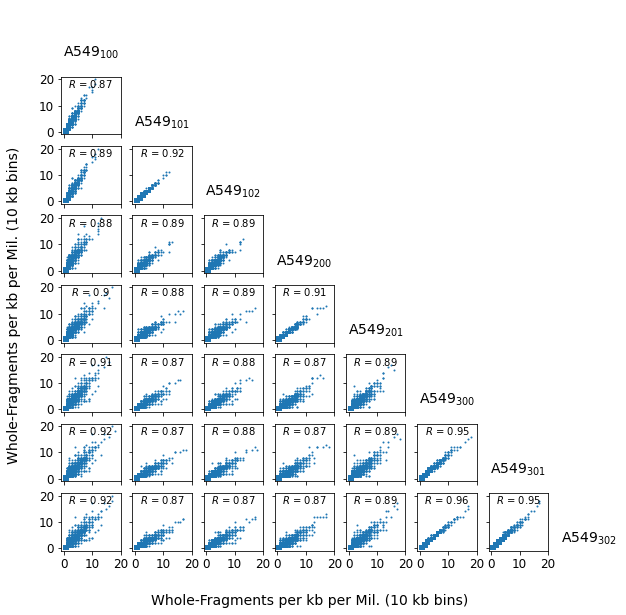

In [14]:
fig,ax = plt.subplots(8,8,figsize=(10,10),sharex=True,sharey=True);
fig.set_facecolor('w')

pearsons = []

for i,m1 in enumerate(a549_names):
    
    for j,m2 in enumerate(a549_names):
        
        if i > j:
            
            x = a549[m1].values
            y = a549[m2].values
            
            r = sims.copearson(x,y)
            
            pearsons.append((m1,m2,r))
            
            plt.sca(ax[i,j])
            plt.plot(x,y,'.',ms=2)
            plt.xticks(np.arange(0,30,10),fontsize=12)
            plt.yticks(np.arange(0,30,10),fontsize=12)
            #plt.text(x=15,y=3,s='$R$ = %s'%(round(r,2)),va='center',ha='center')
            plt.title('$R$ = %s'%(round(r,2)),y=0.7,fontsize=10)
            
        elif i == j:
            
            s = name_dict[m1]
            plt.sca(ax[i,j])
            plt.title(s,y=0.035,fontsize=14)
            plt.axis('off')
            
        else:
            plt.sca(ax[i,j]);plt.axis('off')
            
xlabel = 'Whole-Fragments per kb per Mil. (10 kb bins)'
fig.text(x=0.25,y=0.05,s=xlabel,fontsize=14)
fig.text(x=0.05,y=0.25,s=xlabel,fontsize=14,rotation=90);

In [15]:
sims.copearson(x,y)

0.9543852289059536

In [16]:
pd.DataFrame(pearsons).loc[[0,1,2]][2].mean()

0.8950789386313126

In [17]:
pd.DataFrame(pearsons).loc[9,2]

0.9149721500674177

In [18]:
pd.DataFrame(pearsons).loc[[20,26,27]][2].mean()

0.9537980788960945

In [19]:
sims.conmi(x,y)

0.8014993244934195

In [20]:
def rotate(n,x):
    x = list(x)
    return np.array(x[n:] + x[:n])

In [21]:
## Set x and y
x,y = a549[a549_names[-2]].values, a549[a549_names[-1]].values

(array([ 0.,  5., 10., 15., 20.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

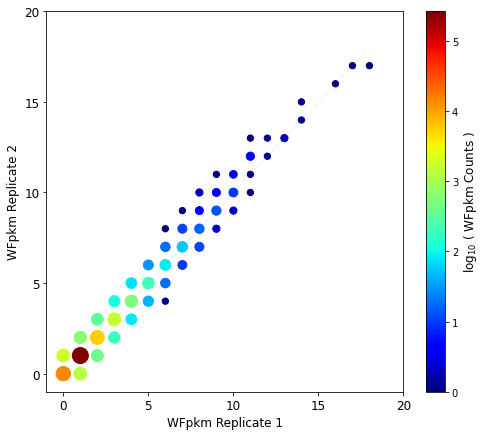

In [22]:
## Call figure and set facecolor
fig,ax = plt.subplots(1,1,figsize=(8,7))
fig.set_facecolor('w')

## Plot a comet plot
epv.cometplot(x,y,ax=ax,plotmod=40);

## Add x and y label
plt.xlabel('WFpkm Replicate 1',fontsize=12)
plt.ylabel('WFpkm Replicate 2',fontsize=12)

## increase fontsize
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

## Save figure
#plt.savefig('../FIGURES/S.Figure.1.png',dpi=300,bbox_inches='tight');

In [23]:
## Mege the dataframes
sampledf = enco.merge(a549,on=['Chrom','Left','Right'])

## Remove vrindas original samples
#sampledf.drop(a549_names[:-3],inplace=True,axis=1)

## View shape
print(sampledf.shape)

## Get all the sample names
samples = epv.getsamples(sampledf)

## Calculate if the samples with "merged" as the start of their name
merge_check = sum([s.split('.')[0] == 'merged' for s in samples])

## Check our work 
assert merge_check == len(samples), "ERROR: There are samples we do not recognize in this list!"

(290066, 27)


In [24]:
## Write ftn for formating the bam file name 
def bamname(s):
    return 'merged.%s.filtq30.bam'%s

## Set table path
table_path = '../MISC/full.table.csv'

## Load table
full_table = pd.read_csv(table_path)

## Make a "bam file" name
bam_file_names = []

## Iterate thru replicate names
for s in full_table['Replicate Name'].tolist():
    ## Seperate the replicate name if the underscore is present 
    if '_' in s:
        new = bamname('_'.join(s.split('\_')))
    else: ## otherwise just pass the new name
        new = bamname(s)
    
    ## append to list
    bam_file_names.append(new)
        
## append column of new bam names
full_table['Bam File'] = bam_file_names

## Make a cellular type dictionary
cell_dict = dict(full_table[['Bam File','Sample Title']].values)

## Order the labels 
ordered_labels = full_table['Sample Title'].tolist()

## View head
full_table.head()

,Cell Line,Replicate Name,Total Reads,Mapped Reads,Not Used,Duplicates,mtDNA,Un-mapped,Low Quality Reads,MACS2 Peaks,FrIP,Sample Title,Source,Bam File
0,A549,ENCLB404SKN,341325836,259029456,21246814,46948944,12009324,408486,1682812,201532,0.5898,A549$_{000}$,ENCSR032RGS,merged.ENCLB404SKN.filtq30.bam
1,A549,ENCLB605LCC,442074976,329679445,27536117,66338506,15475857,506856,2538195,194975,0.5994,A549$_{001}$,ENCSR032RGS,merged.ENCLB605LCC.filtq30.bam
2,A549,ENCLB817BKI,277970512,211291691,18456829,35323112,11170486,343051,1385343,206536,0.5596,A549$_{002}$,ENCSR032RGS,merged.ENCLB817BKI.filtq30.bam
3,A549,2501\_001,65405524,23987725,2973344,3093813,33653170,48906,1648566,110323,0.5880,A549$_{100}$,This study,merged.2501_001.filtq30.bam
4,A549,2501\_002,84816540,22605005,2595465,2481489,55231224,32350,1871007,81917,0.3404,A549$_{101}$,This study,merged.2501_002.filtq30.bam


In [25]:
## Correlate the samples vis norm. mutual. info. removing cozeros
nmi = sampledf[samples].corr(sims.conmi)

## Replace the columns and index
nmi.columns, nmi.index = [cell_dict[c] for c in nmi.columns], [cell_dict[c] for c in nmi.index]

## Reorder the lables 
nmi = nmi.loc[ordered_labels,ordered_labels]


## View the corner
nmi.head().T.head()

,A549$_{000}$,A549$_{001}$,A549$_{002}$,A549$_{100}$,A549$_{101}$
A549$_{000}$,1.000000,0.798904,0.787061,0.638928,0.653432
A549$_{001}$,0.798904,1.000000,0.766570,0.627763,0.636574
A549$_{002}$,0.787061,0.766570,1.000000,0.634301,0.654435
A549$_{100}$,0.638928,0.627763,0.634301,1.000000,0.697339
A549$_{101}$,0.653432,0.636574,0.654435,0.697339,1.000000


In [26]:
## Savout out
nmi.to_csv('../MISC/ENCODE_nmi_wcz.csv',index=True,header=True)

In [27]:
## Correlate the samples vis pearson removing cozeros
per = sampledf[samples].corr(sims.copearson)

## Replace the columns and index
per.columns, per.index = [cell_dict[c] for c in per.columns], [cell_dict[c] for c in per.index]

## Reorder the lables 
per = per.loc[ordered_labels,ordered_labels]

## View the head
per.head().T.head()

,A549$_{000}$,A549$_{001}$,A549$_{002}$,A549$_{100}$,A549$_{101}$
A549$_{000}$,1.000000,0.932060,0.924616,0.823503,0.827718
A549$_{001}$,0.932060,1.000000,0.914832,0.818560,0.816342
A549$_{002}$,0.924616,0.914832,1.000000,0.819706,0.833356
A549$_{100}$,0.823503,0.818560,0.819706,1.000000,0.874431
A549$_{101}$,0.827718,0.816342,0.833356,0.874431,1.000000


In [29]:
## save out pearson
per.to_csv('../MISC/ENCODE_per_wcz.csv')

In [30]:
## Correlate the samples vis pearson removing cozeros
spe = sampledf[samples].corr(sims.cospearman)

## Replace the columns and index
spe.columns, spe.index = [cell_dict[c] for c in spe.columns], [cell_dict[c] for c in spe.index]

## Reorder the lables 
spe = spe.loc[ordered_labels,ordered_labels]

## View the head
spe.head().T.head()

,A549$_{000}$,A549$_{001}$,A549$_{002}$,A549$_{100}$,A549$_{101}$
A549$_{000}$,1.000000,0.916204,0.909996,0.837090,0.835295
A549$_{001}$,0.916204,1.000000,0.900371,0.830012,0.822855
A549$_{002}$,0.909996,0.900371,1.000000,0.831261,0.836007
A549$_{100}$,0.837090,0.830012,0.831261,1.000000,0.850886
A549$_{101}$,0.835295,0.822855,0.836007,0.850886,1.000000


In [31]:
## Save out spe data
spe.to_csv('../MISC/ENCODE_spe_wcz.csv')

In [32]:
## Correlate the samples vis norm. mutual. info. removing cozeros
rsq = sampledf[samples].corr(sims.copearson)**2

## Replace the columns and index
rsq.columns, rsq.index = [cell_dict[c] for c in rsq.columns], [cell_dict[c] for c in rsq.index]

## Reorder the lables 
rsq = rsq.loc[ordered_labels,ordered_labels]

## View the head
rsq.head().T.head()

,A549$_{000}$,A549$_{001}$,A549$_{002}$,A549$_{100}$,A549$_{101}$
A549$_{000}$,1.000000,0.868735,0.854916,0.678157,0.685117
A549$_{001}$,0.868735,1.000000,0.836918,0.670041,0.666414
A549$_{002}$,0.854916,0.836918,1.000000,0.671917,0.694482
A549$_{100}$,0.678157,0.670041,0.671917,1.000000,0.764630
A549$_{101}$,0.685117,0.666414,0.694482,0.764630,1.000000


In [33]:
## Saveout rsq
rsq.to_csv('../MISC/ENCODE_rsq_wcz.csv')

In [28]:
## Set the stat lables
stat_labels = ['Pearson $R$','Spearman '+ '\u03C1','$R^2$','Normalized Mutual Information']

## print to screen
[print(s) for s in stat_labels];

Pearson $R$
Spearman ρ
$R^2$
Normalized Mutual Information


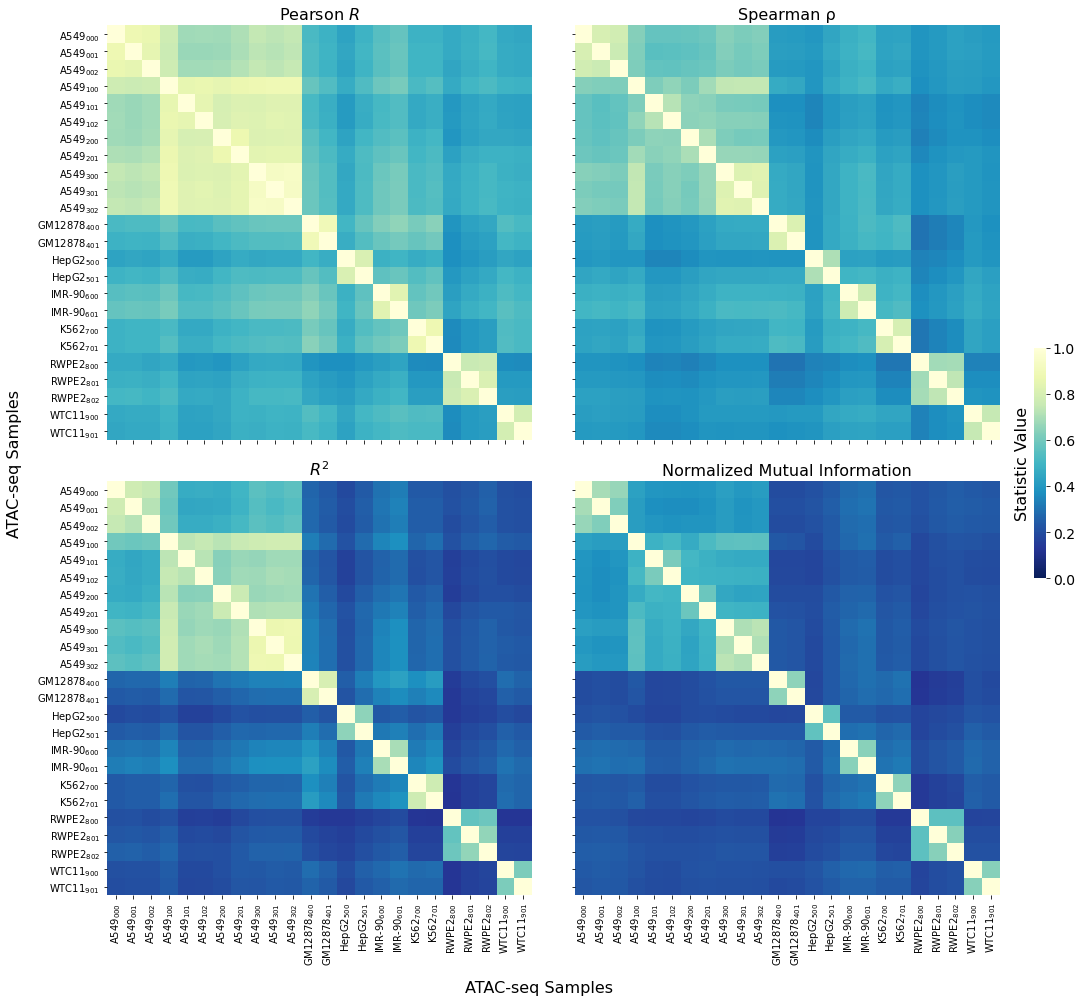

In [29]:
## Call a figure, and set the face color
fig,ax = plt.subplots(2,2,figsize=(16,16),sharex=True,sharey=True)
fig.set_facecolor('w')

## Make a list of the comparisons, set the color map, and make a color bar axis
mycomps, mycmap, cax = [per,spe,rsq,nmi], "YlGnBu_r",  fig.add_axes([0.93,0.4,0.01,0.2])

## Iterate thru the list
for i,df in enumerate(mycomps):

    ## Set the first axis
    plt.sca(ax.ravel()[i])
    
    ## Set the title
    plt.title(stat_labels[i],fontsize=16)

    ## Call the pearson
    sns.heatmap(df,vmin=0,vmax=1,cbar=False if i < 3 else True, cbar_ax=cax,cmap=mycmap)
    
## Set the color bar axis
plt.sca(cax);plt.yticks(fontsize=14); #plt.ylabel('Statistic Value',fontsize=14)

## Adjust the plots
plt.subplots_adjust(wspace=0.1,hspace=0.1);

## Add x and y lables
fig.text(0.5,0.045,'ATAC-seq Samples',fontsize=16,va='center',ha='center')
fig.text(0.045,0.5,'ATAC-seq Samples',fontsize=16,va='center',ha='center',rotation=90)

## Add color bar label manually
fig.text(0.92,0.5,'Statistic Value',fontsize=16,va='center',ha='center',rotation=90);